## Understanding CNN methods

Input shape: (9, 9)


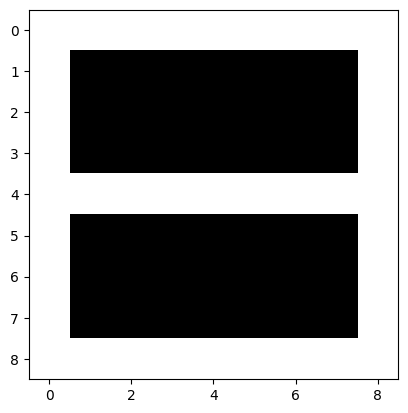

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------
# Step 1: Input image — number "8"
# -------------------------
image = np.array([
    [1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1]
])

print("Input shape:", image.shape)

plt.imshow(image, cmap='gray')


After convolution:
 [[ 2.  0.  0.  0.  0.  0. -2.]
 [ 3.  0.  0.  0.  0.  0. -3.]
 [ 2.  0.  0.  0.  0.  0. -2.]
 [ 2.  0.  0.  0.  0.  0. -2.]
 [ 2.  0.  0.  0.  0.  0. -2.]
 [ 3.  0.  0.  0.  0.  0. -3.]
 [ 2.  0.  0.  0.  0.  0. -2.]]


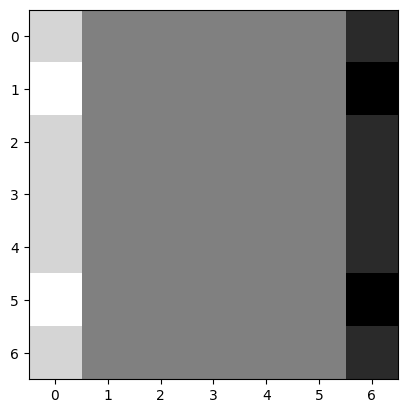

In [21]:

# -------------------------
# Step 2: Convolution (3x3 filter)
# -------------------------
kernel = np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
])  # edge detector

output_shape = image.shape[0] - kernel.shape[0] + 1
conv_output = np.zeros((output_shape, output_shape))

for i in range(output_shape):
    for j in range(output_shape):
        region = image[i:i+3, j:j+3]
        conv_output[i, j] = np.sum(region * kernel)

print("\nAfter convolution:\n", conv_output)

plt.imshow(conv_output, cmap='gray')



After ReLU:
 [[2. 0. 0. 0. 0. 0. 0.]
 [3. 0. 0. 0. 0. 0. 0.]
 [2. 0. 0. 0. 0. 0. 0.]
 [2. 0. 0. 0. 0. 0. 0.]
 [2. 0. 0. 0. 0. 0. 0.]
 [3. 0. 0. 0. 0. 0. 0.]
 [2. 0. 0. 0. 0. 0. 0.]]


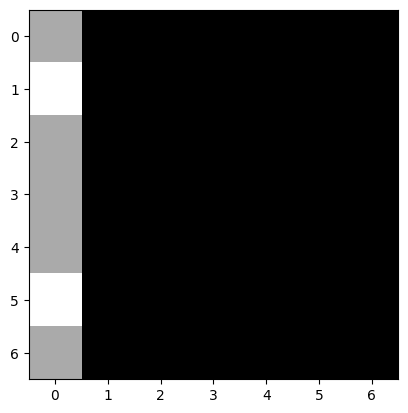

In [22]:
# -------------------------
# Step 3: ReLU activation
# -------------------------
relu_output = np.maximum(conv_output, 0)
print("\nAfter ReLU:\n", relu_output)

plt.imshow(relu_output, cmap='gray')


After max pooling:
 [[3. 0. 0.]
 [2. 0. 0.]
 [3. 0. 0.]]


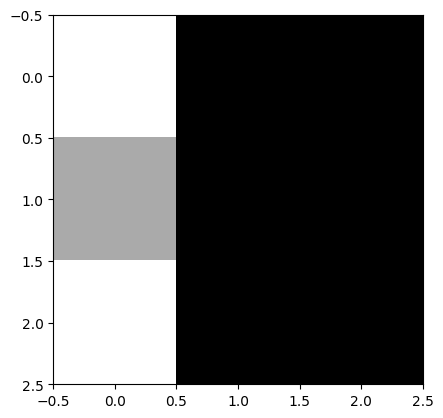

In [23]:
# -------------------------
# Step 4: Max pooling (2x2, safe bounds)
# -------------------------
pool_size = 2
pooled_rows = relu_output.shape[0] // pool_size
pooled_cols = relu_output.shape[1] // pool_size
pooled_output = np.zeros((pooled_rows, pooled_cols))

for i in range(pooled_rows):
    for j in range(pooled_cols):
        region = relu_output[i*pool_size:(i+1)*pool_size, j*pool_size:(j+1)*pool_size]
        pooled_output[i, j] = np.max(region)

print("\nAfter max pooling:\n", pooled_output)

plt.imshow(pooled_output, cmap='gray')

In [29]:
# -------------------------
# Step 5: Fully connected (flatten + output)
# -------------------------
flattened = pooled_output.flatten()
print("\nFlattened feature vector:", flattened)

# Tiny dense layer (2 output classes)
weights = np.random.randn(2, len(flattened))
biases = np.random.randn(2)
output = np.dot(weights, flattened) + biases

print("\nFinal output (class scores):", output)


Flattened feature vector: [3. 0. 0. 2. 0. 0. 3. 0. 0.]

Final output (class scores): [0.87773008 6.04728993]


What if we change the kernel?

Input shape: (9, 9)

After convolution:
 [[-2.  0.  0.  0.  0.  0.  2.]
 [-3.  0.  0.  0.  0.  0.  3.]
 [-2.  0.  0.  0.  0.  0.  2.]
 [-2.  0.  0.  0.  0.  0.  2.]
 [-2.  0.  0.  0.  0.  0.  2.]
 [-3.  0.  0.  0.  0.  0.  3.]
 [-2.  0.  0.  0.  0.  0.  2.]]

After ReLU:
 [[0. 0. 0. 0. 0. 0. 2.]
 [0. 0. 0. 0. 0. 0. 3.]
 [0. 0. 0. 0. 0. 0. 2.]
 [0. 0. 0. 0. 0. 0. 2.]
 [0. 0. 0. 0. 0. 0. 2.]
 [0. 0. 0. 0. 0. 0. 3.]
 [0. 0. 0. 0. 0. 0. 2.]]

After max pooling:
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]

Flattened feature vector: [0. 0. 0. 0. 0. 0. 0. 0. 0.]

Final output (class scores): [ 0.43334935 -0.34834535]


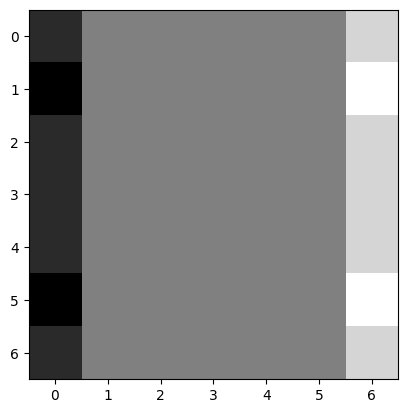

In [30]:
import numpy as np

# -------------------------
# Step 1: Input image — number "8"
# -------------------------
image = np.array([
    [1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1]
])
print("Input shape:", image.shape)

# -------------------------
# Step 2: Convolution (3x3 filter)
# -------------------------
kernel = np.array([
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]
])  # edge detector

output_shape = image.shape[0] - kernel.shape[0] + 1
conv_output = np.zeros((output_shape, output_shape))

for i in range(output_shape):
    for j in range(output_shape):
        region = image[i:i+3, j:j+3]
        conv_output[i, j] = np.sum(region * kernel)

print("\nAfter convolution:\n", conv_output)

plt.imshow(conv_output, cmap='gray')

# -------------------------
# Step 3: ReLU activation
# -------------------------
relu_output = np.maximum(conv_output, 0)
print("\nAfter ReLU:\n", relu_output)

# plt.imshow(relu_output, cmap='gray')

# -------------------------
# Step 4: Max pooling (2x2, safe bounds)
# -------------------------
pool_size = 2
pooled_rows = relu_output.shape[0] // pool_size
pooled_cols = relu_output.shape[1] // pool_size
pooled_output = np.zeros((pooled_rows, pooled_cols))

for i in range(pooled_rows):
    for j in range(pooled_cols):
        region = relu_output[i*pool_size:(i+1)*pool_size, j*pool_size:(j+1)*pool_size]
        pooled_output[i, j] = np.max(region)

print("\nAfter max pooling:\n", pooled_output)

# -------------------------
# Step 5: Fully connected (flatten + output)
# -------------------------
flattened = pooled_output.flatten()
print("\nFlattened feature vector:", flattened)

# Tiny dense layer (2 output classes)
weights = np.random.randn(2, len(flattened))
biases = np.random.randn(2)
output = np.dot(weights, flattened) + biases

print("\nFinal output (class scores):", output)


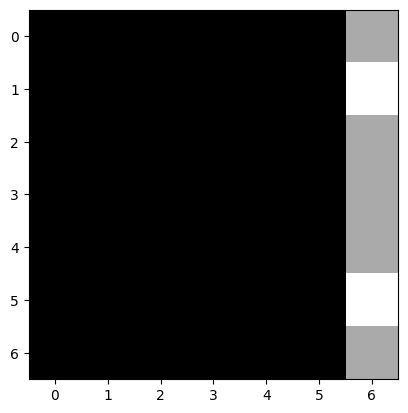

In [31]:
plt.imshow(relu_output, cmap='gray')

Input shape: (9, 9)

After convolution:
 [[ 2.  3.  3.  3.  3.  3.  2.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [-2. -3. -3. -3. -3. -3. -2.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 2.  3.  3.  3.  3.  3.  2.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [-2. -3. -3. -3. -3. -3. -2.]]

After ReLU:
 [[2. 3. 3. 3. 3. 3. 2.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [2. 3. 3. 3. 3. 3. 2.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]

After max pooling:
 [[3. 3. 3.]
 [0. 0. 0.]
 [3. 3. 3.]]

Flattened feature vector: [3. 3. 3. 0. 0. 0. 3. 3. 3.]

Final output (class scores): [-4.25482354 -0.09273947]


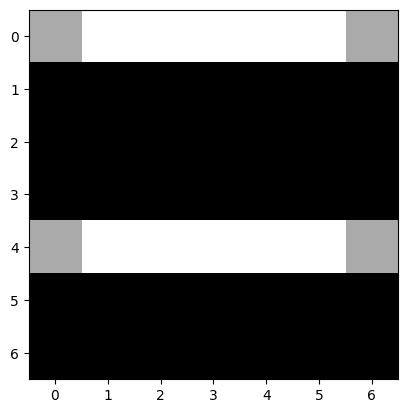

In [32]:
import numpy as np

# -------------------------
# Step 1: Input image — number "8"
# -------------------------
image = np.array([
    [1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1]
])
print("Input shape:", image.shape)

# -------------------------
# Step 2: Convolution (3x3 filter)
# -------------------------
kernel = np.array([
    [1, 1, 1],
    [0, 0, 0],
    [-1, -1, -1]
])  # edge detector

output_shape = image.shape[0] - kernel.shape[0] + 1
conv_output = np.zeros((output_shape, output_shape))

for i in range(output_shape):
    for j in range(output_shape):
        region = image[i:i+3, j:j+3]
        conv_output[i, j] = np.sum(region * kernel)

print("\nAfter convolution:\n", conv_output)

# -------------------------
# Step 3: ReLU activation
# -------------------------
relu_output = np.maximum(conv_output, 0)
print("\nAfter ReLU:\n", relu_output)

plt.imshow(relu_output, cmap='gray')
# -------------------------
# Step 4: Max pooling (2x2, safe bounds)
# -------------------------
pool_size = 2
pooled_rows = relu_output.shape[0] // pool_size
pooled_cols = relu_output.shape[1] // pool_size
pooled_output = np.zeros((pooled_rows, pooled_cols))

for i in range(pooled_rows):
    for j in range(pooled_cols):
        region = relu_output[i*pool_size:(i+1)*pool_size, j*pool_size:(j+1)*pool_size]
        pooled_output[i, j] = np.max(region)

print("\nAfter max pooling:\n", pooled_output)

# -------------------------
# Step 5: Fully connected (flatten + output)
# -------------------------
flattened = pooled_output.flatten()
print("\nFlattened feature vector:", flattened)

# Tiny dense layer (2 output classes)
weights = np.random.randn(2, len(flattened))
biases = np.random.randn(2)
output = np.dot(weights, flattened) + biases

print("\nFinal output (class scores):", output)


## Now lets build a CNN using PyTorch!

In [52]:
# import packages
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor

# read in data fashion MNIST

# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

# device 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

# create data loaders
batch_size = 64
train_dataloader = DataLoader(training_data, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

# create a model

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.feature_extractor = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, padding=1), # Batch size, channels, height, width (64, 1, 28, 28)
            nn.ReLU(),
            nn.MaxPool2d(2), # (64, 16, 14, 14)

            nn.Conv2d(16, 32, kernel_size=3, padding=1), # (64, 32, 14, 14)
            nn.ReLU(),
            nn.MaxPool2d(2), # (64, 32, 7, 7)

            nn.Conv2d(32, 64, kernel_size=3, padding=1), # (64, 64, 7, 7)
            nn.ReLU(),
            nn.MaxPool2d(2) # (64, 64, 3, 3)
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64 * 3 * 3, 512), # (64, 64*3*3) -> (64, 128)
            nn.ReLU(),
            nn.Linear(512, 256), # (64, 10)
            nn.ReLU(),
            nn.Linear(256, 10) # (64, 10)
        )

    def forward(self, x):
        x = self.feature_extractor(x)
        x = self.classifier(x)
        return x # (64, 10) - logits for 10 classes
    
model = SimpleCNN().to(device)
print(model)

# train and evaluate the model
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

def train(model, dataloader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    for images, labels in dataloader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        logits = model(images)
        loss = criterion(logits, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)
    epoch_loss = running_loss / len(dataloader.dataset)
    return epoch_loss

def evaluate(model, dataloader, criterion, device):
    model.eval()
    running_loss = 0.0
    correct = 0
    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)
            logits = model(images)
            loss = criterion(logits, labels)
            running_loss += loss.item() * images.size(0)
            _, preds = torch.max(logits, 1)
            correct += (preds == labels).sum().item()
    epoch_loss = running_loss / len(dataloader.dataset)
    accuracy = correct / len(dataloader.dataset)
    return epoch_loss, accuracy

num_epochs = 10
for epoch in range(num_epochs):
    train_loss = train(model, train_dataloader, criterion, optimizer, device)
    test_loss, test_accuracy = evaluate(model, test_dataloader, criterion, device)
    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy*100:.4f}%")

cpu
SimpleCNN(
  (feature_extractor): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=576, out_features=512, bias=True)
    (2): ReLU()
    (3): Linear(in_features=512, out_features=256, bias=True)
    (4): ReLU()
    (5): Linear(in_features=256, out_features=10, bias=True)
  )
)
Epoch 1/10, Train Loss: 0.5711, Test Loss: 0.3754, Test Accuracy: 86.2500%
Epoch 2/10, Train Loss: 0.3263, Test Loss: 0.3248, Tes

Input image shape: torch.Size([28, 28])
Conv1 output shape: torch.Size([16, 28, 28])


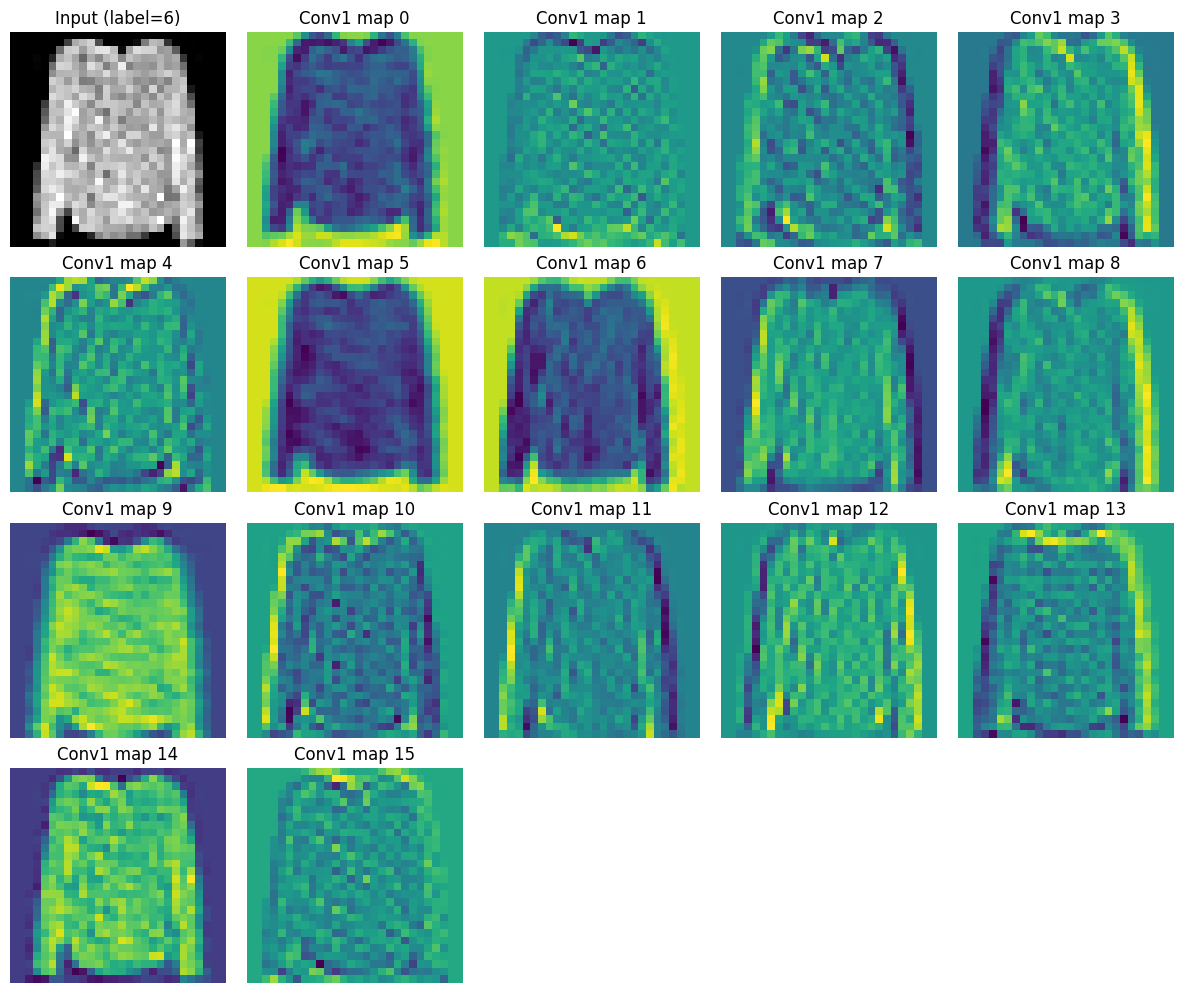

In [55]:
# Plot the outputs ("feature maps") right after the FIRST convolution layer
# This visualizes what the 16 conv filters detect on one input image.

import matplotlib.pyplot as plt
import torch

# Grab one batch
images, labels = next(iter(train_dataloader))
images = images.to(device)

# Get first conv layer (Conv2d(1,16,3,padding=1))
first_conv = model.feature_extractor[0]

# Run only the first convolution (no ReLU/pool yet)
with torch.no_grad():
    conv1_out = first_conv(images)  # shape: (B, 16, 28, 28)

# Choose one example from the batch
idx = 0
x = images[idx, 0].detach().cpu()                 # (28, 28) input image (1 channel)
fmaps = conv1_out[idx].detach().cpu()             # (16, 28, 28) feature maps

print("Input image shape:", x.shape)
print("Conv1 output shape:", fmaps.shape)

# Plot input + all 16 feature maps
fig, axes = plt.subplots(4, 5, figsize=(12, 10))
axes = axes.flatten()

# Input in first slot
axes[0].imshow(x, cmap="gray")
axes[0].set_title(f"Input (label={labels[idx].item()})")
axes[0].axis("off")

# Feature maps
for i in range(16):
    ax = axes[i + 1]
    ax.imshow(fmaps[i], cmap="viridis")
    ax.set_title(f"Conv1 map {i}")
    ax.axis("off")

# Hide any unused axes (4*5=20 slots, we use 17)
for j in range(17, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()


Input image shape: torch.Size([28, 28])
Conv2 output shape: torch.Size([32, 14, 14])


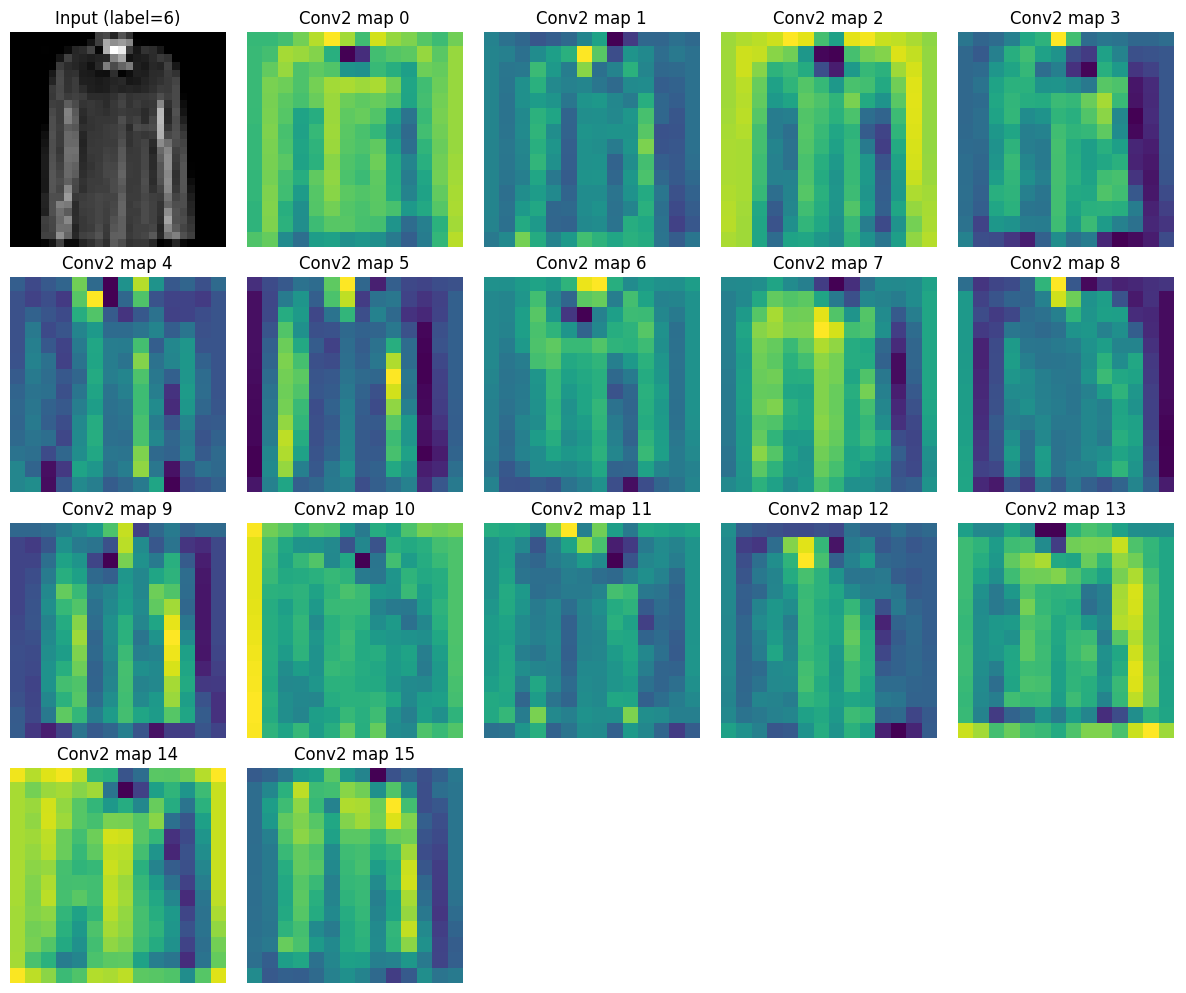

In [56]:
# Plot the outputs ("feature maps") right after the SECOND convolution layer

import matplotlib.pyplot as plt
import torch

# Grab one batch
images, labels = next(iter(train_dataloader))
images = images.to(device)

# Layers up to and including conv2:
# feature_extractor = [0:Conv1, 1:ReLU, 2:Pool, 3:Conv2, ...]
conv2_prefix = torch.nn.Sequential(*list(model.feature_extractor[:4])).to(device)

with torch.no_grad():
    conv2_out = conv2_prefix(images)  # shape: (B, 32, 14, 14)

idx = 0
x = images[idx, 0].detach().cpu()          # (28, 28)
fmaps = conv2_out[idx].detach().cpu()      # (32, 14, 14)

print("Input image shape:", x.shape)
print("Conv2 output shape:", fmaps.shape)

# Plot input + first 16 of the 32 conv2 feature maps (change n_maps if you want more)
n_maps = 16

fig, axes = plt.subplots(4, 5, figsize=(12, 10))
axes = axes.flatten()

axes[0].imshow(x, cmap="gray")
axes[0].set_title(f"Input (label={labels[idx].item()})")
axes[0].axis("off")

for i in range(n_maps):
    ax = axes[i + 1]
    ax.imshow(fmaps[i], cmap="viridis")
    ax.set_title(f"Conv2 map {i}")
    ax.axis("off")

for j in range(n_maps + 1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()


Input image shape: torch.Size([28, 28])
Conv3 output shape: torch.Size([64, 7, 7])


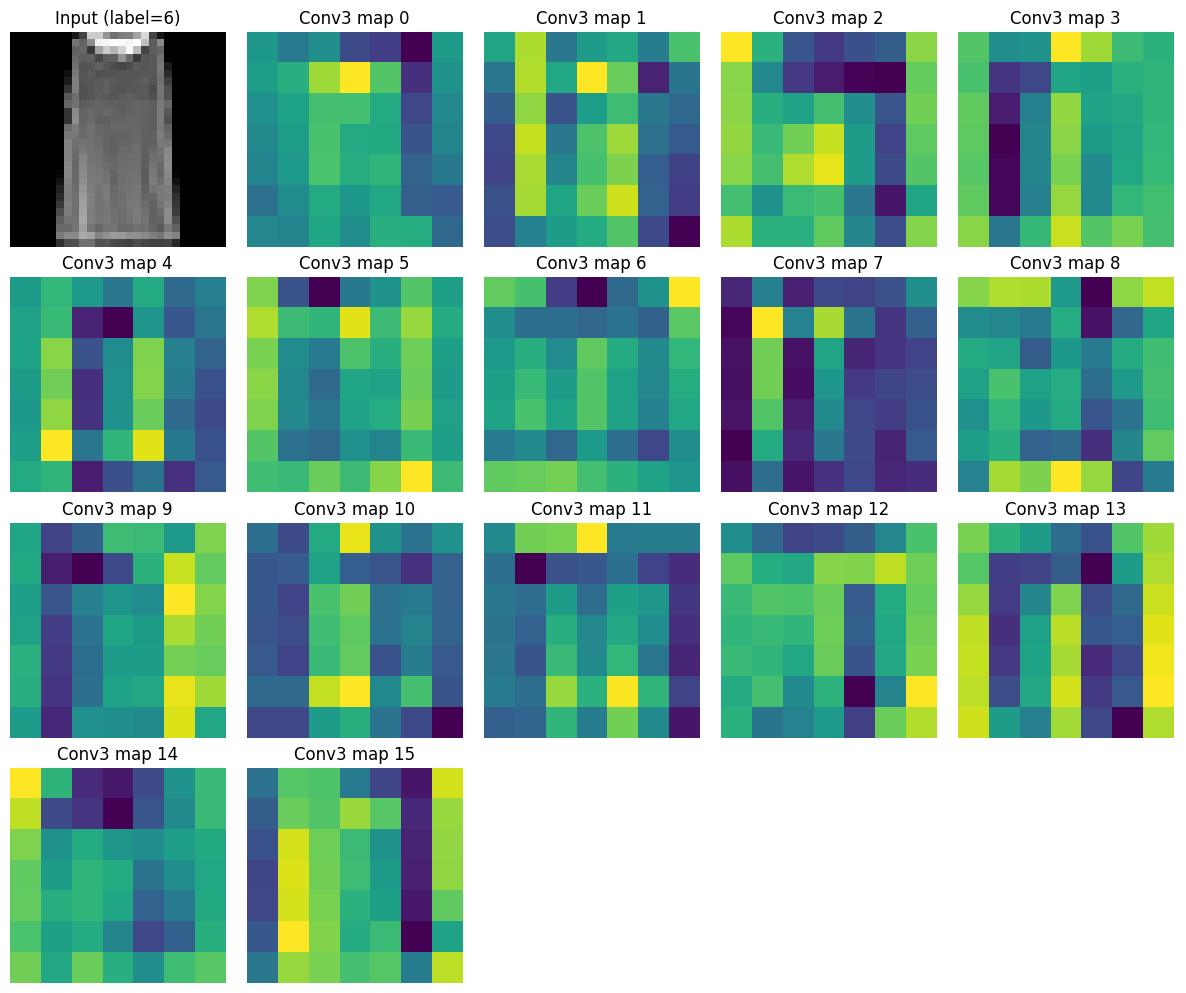

In [58]:
# Plot the outputs ("feature maps") right after the LAST convolution layer (Conv3)

import matplotlib.pyplot as plt
import torch

# Grab one batch
images, labels = next(iter(train_dataloader))
images = images.to(device)

# feature_extractor indices:
# 0 Conv1, 1 ReLU, 2 Pool,
# 3 Conv2, 4 ReLU, 5 Pool,
# 6 Conv3, 7 ReLU, 8 Pool
conv3_prefix = torch.nn.Sequential(*list(model.feature_extractor[:7])).to(device)

with torch.no_grad():
    conv3_out = conv3_prefix(images)  # shape: (B, 64, 7, 7)

idx = 0
x = images[idx, 0].detach().cpu()        # (28, 28)
fmaps = conv3_out[idx].detach().cpu()    # (64, 7, 7)

print("Input image shape:", x.shape)
print("Conv3 output shape:", fmaps.shape)

# Plot input + first 16 of the 64 conv3 feature maps (change n_maps for more)
n_maps = 16

fig, axes = plt.subplots(4, 5, figsize=(12, 10))
axes = axes.flatten()

axes[0].imshow(x, cmap="gray")
axes[0].set_title(f"Input (label={labels[idx].item()})")
axes[0].axis("off")

for i in range(n_maps):
    ax = axes[i + 1]
    ax.imshow(fmaps[i], cmap="viridis")
    ax.set_title(f"Conv3 map {i}")
    ax.axis("off")

for j in range(n_maps + 1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()
